In [1]:
import pandas as pd

In [43]:
sp = pd.read_csv('datasets/sp500.csv', index_col='date', parse_dates=True).drop(columns='adj_close')

In [4]:
pd.concat([sp.head(2), sp.tail(2)], axis=0) # starts Jan, 3 2017, ends Dec, 31. Only working days inclded

,high,low,open,close,volume
date,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000
2018-12-28,2520.270020,2472.889893,2498.770020,2485.739990,3702620000
2018-12-31,2509.239990,2482.820068,2498.939941,2506.850098,3442870000


In [7]:
# show the data from the 3rd quarter 2017
sp.loc['2017-Q3'].head(1)

,high,low,open,close,volume
date,,,,,
2017-07-03,2439.169922,2428.689941,2431.389893,2429.01001,1962290000


In [13]:
sp.nlargest(n=3, columns=['close'])

,high,low,open,close,volume
date,,,,,
2018-09-20,2934.800049,2919.729980,2919.729980,2930.750000,3337730000
2018-09-21,2940.909912,2927.110107,2936.760010,2929.669922,5607610000
2018-10-03,2939.860107,2921.360107,2931.689941,2925.510010,3598710000


In [14]:
sp.sample(3, random_state=42).sort_index()

,high,low,open,close,volume
date,,,,,
2017-04-19,2352.629883,2335.050049,2346.790039,2338.169922,3519900000
2018-01-26,2872.870117,2846.179932,2847.479980,2872.870117,3443230000
2018-02-27,2789.149902,2744.219971,2780.449951,2744.280029,3745080000


In [9]:
sp.reset_index()

,date,high,low,open,close,volume
0,2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000
1,2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000
2,2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000
3,2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000
4,2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000
...,...,...,...,...,...,...
497,2018-12-24,2410.340088,2351.100098,2400.560059,2351.100098,2613930000
498,2018-12-26,2467.760010,2346.580078,2363.120117,2467.699951,4233990000
499,2018-12-27,2489.100098,2397.939941,2442.500000,2488.830078,4096610000
500,2018-12-28,2520.270020,2472.889893,2498.770020,2485.739990,3702620000


In [25]:
# create a new column day_of_week using the assign method
# doesn't have inplace=True, have to reassign. inplace=True will create a column inplace
sp.assign(day_of_week=lambda x: x.index.day_name(), month=lambda x: x.index.month, nice_day=True)

,high,low,open,close,volume,day_of_week,month,nice_day
date,,,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,Tuesday,1,True
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,Wednesday,1,True
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,Thursday,1,True
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,Friday,1,True
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,Monday,1,True
...,...,...,...,...,...,...,...,...
2018-12-24,2410.340088,2351.100098,2400.560059,2351.100098,2613930000,Monday,12,True
2018-12-26,2467.760010,2346.580078,2363.120117,2467.699951,4233990000,Wednesday,12,True
2018-12-27,2489.100098,2397.939941,2442.500000,2488.830078,4096610000,Thursday,12,True


In [26]:
# data contains only Mon-Fri days
sp.assign(day_of_week=lambda x: x.index.day_name()).day_of_week.unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype=object)

In [39]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

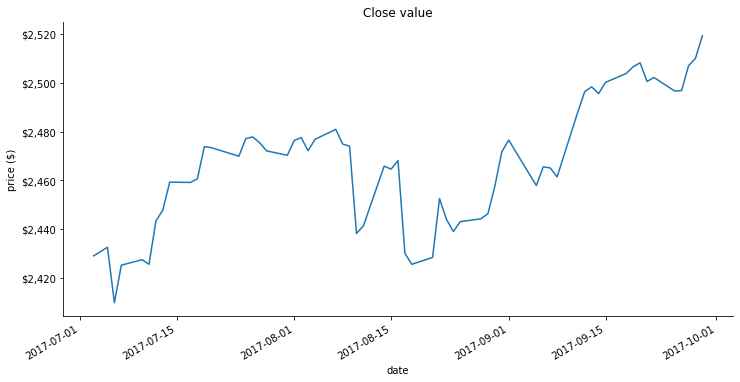

In [45]:
# plot doesn't notice missed dates
ax = sp.loc['2017-Q3'].plot(y='close', figsize=(12, 6), title='Close value', legend=False)
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.ylabel('price ($)')
# remove top and right frame lines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

In [17]:
# create a date range from Jan 1 2017 till Dec 31, 2018 as a new index and use later to fill the missing dates
new_index = index=pd.date_range(start='2017-01-01', end='2018-12-31', freq='D')
new_index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=730, freq='D')

In [18]:
# reindex: add weekends and holidays and fills with 0, or leave it NaN to fill later with previous values
# didn't change the original data frame
sp.reindex(index=new_index, fill_value=0)

,high,low,open,close,volume
2017-01-01,0.000000,0.000000,0.000000,0.000000,0
2017-01-02,0.000000,0.000000,0.000000,0.000000,0
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000
...,...,...,...,...,...
2018-12-27,2489.100098,2397.939941,2442.500000,2488.830078,4096610000
2018-12-28,2520.270020,2472.889893,2498.770020,2485.739990,3702620000
2018-12-29,0.000000,0.000000,0.000000,0.000000,0
2018-12-30,0.000000,0.000000,0.000000,0.000000,0


In [46]:
# save with nulls
sp_new = sp.reindex(index=new_index)

In [35]:
sp.head(3)

,high,low,open,close,volume
2017-01-01,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09


__Fill nulls__
- `ffil`: brings values forward
- `bfill`: back propagates the values
- `nearest`: rows closest to the missing data

These methods can be used with `reindex(..., method='ffil')`

In [47]:
sp_new.shape, sp.shape

((730, 5), (502, 5))

In [48]:
sp_new.columns

Index(['high', 'low', 'open', 'close', 'volume'], dtype='object')

In [58]:
import numpy as np

In [62]:
# reassign values
sp_new = sp_new.assign(
    # put 0 when the market is closed
    volume = lambda x: x.volume.fillna(0),
    # the close date on the weekend is the same as on Friday, so we fill forward
    close = lambda x: x.close.fillna(method='ffill'),
    # us np.where to fill nulls in open, high, low based with close price
    open = lambda x: np.where(x.open.isnull(), x.close, x.open),
    high = lambda x: np.where(x.high.isnull(), x.close, x.high),
    low = lambda x: np.where(x.low.isnull(), x.close, x.low),
)

In [63]:
sp_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2017-01-01 to 2018-12-31
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   high    728 non-null    float64
 1   low     728 non-null    float64
 2   open    728 non-null    float64
 3   close   728 non-null    float64
 4   volume  730 non-null    float64
dtypes: float64(5)
memory usage: 34.2 KB


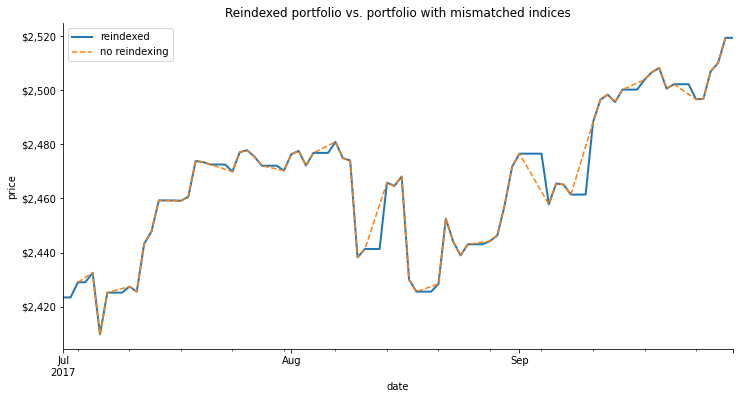

In [65]:
# plot the reindexed portfolio's closing price from Q4 2017 through Q2 2018
ax = sp_new.loc['2017-Q3'].plot(
    y='close', label='reindexed', figsize=(12, 6), linewidth=2, 
    title='Reindexed portfolio vs. portfolio with mismatched indices'
)

# add line for original portfolio for comparison

sp.loc['2017-Q3'].plot(
    y='close', ax=ax, linestyle='--', label='no reindexing'
)
# formatting
ax.set_ylabel('price')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# show the plot
plt.show()